# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [99]:
#a)
#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])
#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

#Dataframe
df_transform = pd.DataFrame(df_rot.T, columns=['Media', 'Diferença'])
df = pd.concat([df, df_transform], axis=1)
df.head()

,p1,p2,Media,Diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [101]:
#b)
corr = df['p1'].corr(df['p2'])
print("Correlação entre p1 e p2:", corr)

Correlação entre p1 e p2: 0.8957365818728046


In [103]:
#c)
corr = df['Media'].corr(df['Diferença'])
print("Correlação entre Media e Diferença:", corr)

Correlação entre Media e Diferença: 0.13347385411788837


d) Pode se notar que p1 e p2 possuem uma alta correlação enquanto a média e a diferença possuem uma baixa correlação

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [107]:
#Matriz de transformação
m = np.array([ 1, 1])
#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

#Dataframe
df_transform = pd.DataFrame(df_rot.T, columns=['Soma'])
df = pd.concat([df, df_transform], axis=1)
df.head()

,p1,p2,Media,Diferença,Soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


In [121]:

def transf_lin(m):
    
    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())
    
    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)
    
    xmin = -15
    xmax = 15
    ymin = -15
    ymax = 15
    
    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')
    
    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')
    
    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)
    
    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)
    
    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')
    
    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')
    
    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')
    
    #Legenda
    plt.legend(loc='lower right')


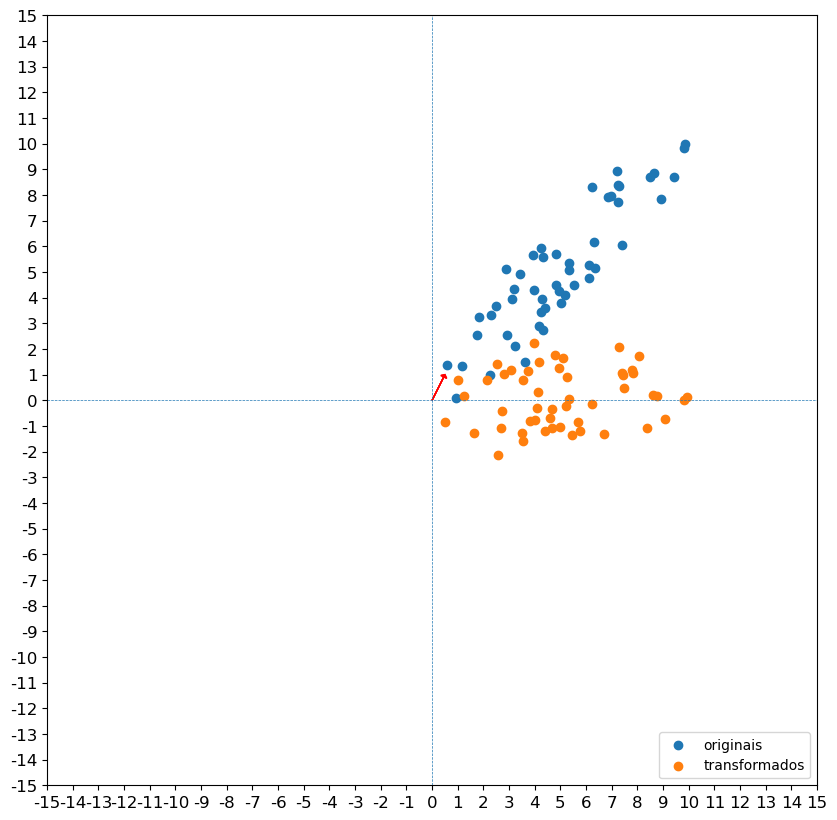

In [123]:
#Matriz de transformação média e diferrença
t = np.array([[ 0.5, 0.5],
              [ -1, 1]])
transf_lin(t)

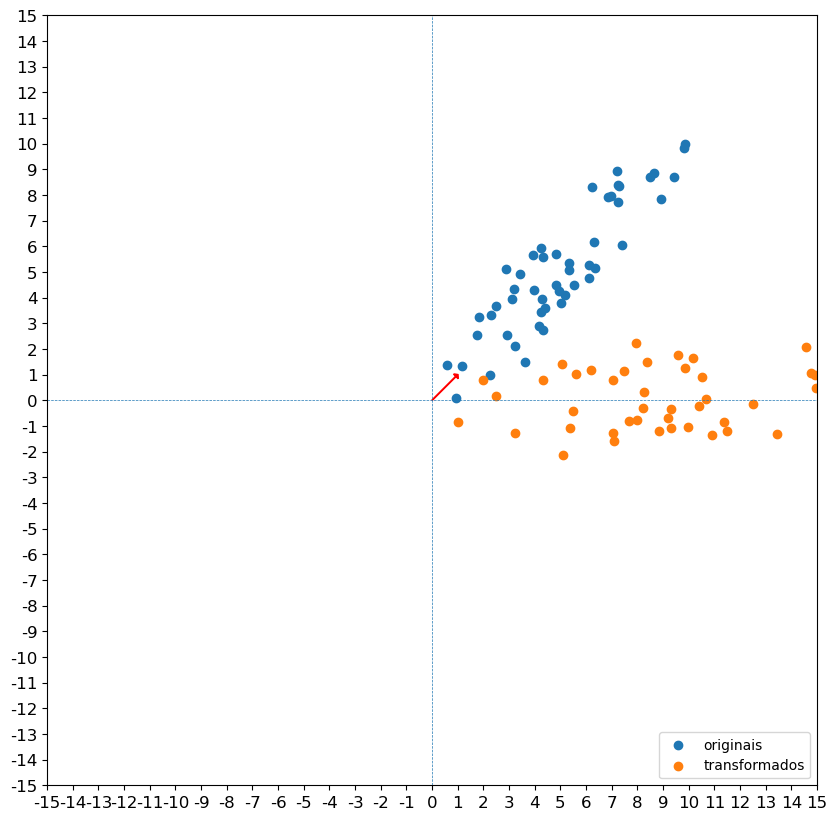

In [124]:
#Matriz de transformação soma e diferença
t = np.array([[ 1, 1],
              [ -1, 1]])
transf_lin(t)

    Nota-se que o gráfico de média e diferença possui os dados transformados mas concentrados enquanto os do gráfico soma e diferença os dados são mais espalhados, a rotação de ambos são a mesm